이번 번역은 앞서 번역했던 Data_Sciencetutorial_for_Beginners에서 Data Visualization부분 중 하나인 Seaborn 부분을 번역하였습니다.
원본은 https://www.kaggle.com/kanncaa1/seaborn-tutorial-for-beginners 를 참고 해주시기 바랍니다.

역자 : 이 커널은 Data Visualization만을 위한 커널이라기보단 이 커널을 해결하기위해 데이터를 Visualization 예를 보여준거같습니다.

# 목차
1. 데이터 읽기
1. 각 주(state)의 빈곤율(poverty rate )
1. 사망한 사람들의 가장 흔한 성과 이름 15개
1. 주(state)에서 25세 이상인 사람들의 고등학교 졸업률
1. 흑인, 백인, 아메리카 원주민, 아시아 및 히스패닉 인종들의 주(state) 인구 비율
1. 고등학교 졸업률 vs 주(state)의 빈곤율
1. 특징 없애기(Kill properties)
    * 사망 방식 (Manner of death)
    * 살인 무기 (Kill weapon)
    * 사망자들의 연령
    * 사망자들의 인종
    * 가장 위험한 도시들
    * 가장 위험한 주(state)들
    * 사망자들이 정신질환을 가지고 있었는지 없었는지.
    * 위협 유형
    * 도망 유형
    * 경찰이 바디캠(body cam)을 가지고 있었는지 없었는지
1. 사망자 데이터에서 주(state)의 인종 비율
1. 사망자 데이터에서 주(state)의 사망자 수
1. Plot 시각화 튜토리얼 : https://www.kaggle.com/kanncaa1/plotly-tutorial-for-beginners
<br>
<br>
Plot Contents:
* [Bar Plot](#1)
* [Point Plot](#2)
* [Joint Plot](#3)
* [Pie Chart](#4)
* [Lm Plot](#5)
* [Kde Plot](#6)
* [Violin Plot](#7)
* [Heatmap](#8)
* [Box Plot](#9)
* [Swarm Plot](#10)
* [Pair Plot](#11)
* [Count Plot](#12)
    


In [64]:
# Python 3 환경에는 많은 유용한 분석 라이브러리들이 설치되어져있다.
# 이것은 kaggle/python 도커(docker) 이미지는 다음 링크에서 받을수 있다. : https://github.com/kaggle/docker-python
# 예를 들어 불러올때 유용한 몇개의 패키지가 있습니다.

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
# 입력데이터 파일은 "../input/"에 있습니다.
# 역자: 종료된 커널이다보니 종종 directory 위치가 바뀐 경우가 있다.
# 역자는 따로 file_path 변수를 생성하여 입력 데이터 위치를 맞춰주고자 한다.
# 독자분들께서는 file_path를 자신의 환경에 맞게 수정해주시길 바랍니다.

# file_path = 'D:\Chameleon\pytorch\연습\pytorch_exam\DataSet\Fatal Police Shootings in the US'
file_path = '../../DataSet/Fatal Police Shootings in the US/'
import warnings
warnings.filterwarnings('ignore')

from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))
# print(check_output(["ls", file_path]).decode("utf8"))

# 현재 디렉토리에 쓰는 모든 결과는 출력으로 저장됩니다.

In [65]:
# data 읽기
median_house_hold_in_come = pd.read_csv(file_path+"/MedianHouseholdIncome2015.csv", encoding="windows-1252")
percentage_people_below_poverty_level = pd.read_csv(file_path + "/PercentagePeopleBelowPovertyLevel.csv", encoding="windows-1252")
percent_over_25_completed_highSchool = pd.read_csv(file_path+'/PercentOver25CompletedHighSchool.csv', encoding="windows-1252")
share_race_city = pd.read_csv(file_path+'/ShareRaceByCity.csv', encoding="windows-1252")
kill = pd.read_csv(file_path+'/PoliceKillingsUS.csv', encoding="windows-1252")

In [66]:
percentage_people_below_poverty_level.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [67]:
percentage_people_below_poverty_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [68]:
percentage_people_below_poverty_level.poverty_rate.value_counts()

0       1464
-        201
6.7      129
7.4      129
10       128
        ... 
58.5       1
69.1       1
83.7       1
65.1       1
93.4       1
Name: poverty_rate, Length: 771, dtype: int64

In [69]:
percentage_people_below_poverty_level['Geographic Area'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

<a id="1"></a> 
## Bar Plot

Text(0.5, 1.0, 'Poverty Rate Given States')

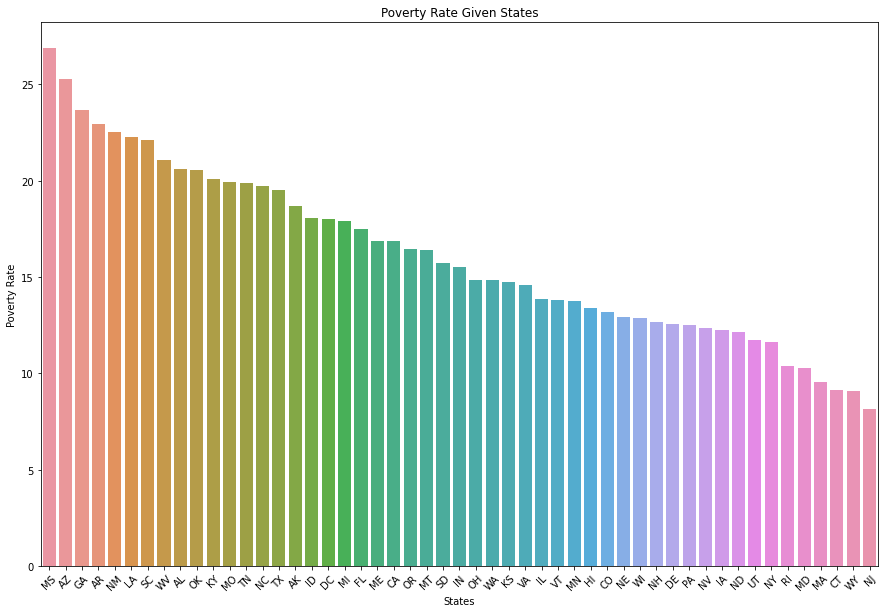

In [70]:
# Proverty rate of each state
# 각 주의(state) 빈곤율
percentage_people_below_poverty_level.poverty_rate.replace(['-'],0.0,inplace = True)
percentage_people_below_poverty_level.poverty_rate = percentage_people_below_poverty_level.poverty_rate.astype(float)
area_list = list(percentage_people_below_poverty_level['Geographic Area'].unique())
area_poverty_ratio =[]
for i in area_list:
    x = percentage_people_below_poverty_level[percentage_people_below_poverty_level['Geographic Area']==i]
    area_poverty_rate = sum(x.poverty_rate)/len(x)
    area_poverty_ratio.append(area_poverty_rate)
data = pd.DataFrame({'area_list' : area_list, 'area_poverty_ratio':area_poverty_ratio})
new_index = (data['area_poverty_ratio'].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)

#visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['area_list'], y=sorted_data['area_poverty_ratio'])
plt.xticks(rotation= 45)
plt.xlabel('States')
plt.ylabel('Poverty Rate')
plt.title('Poverty Rate Given States')

In [71]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [72]:
# kill.name.value_counts()
["ali","haydar"]

['ali', 'haydar']

Text(0.5, 1.0, 'Most common 15 Name or Surname of killed people')

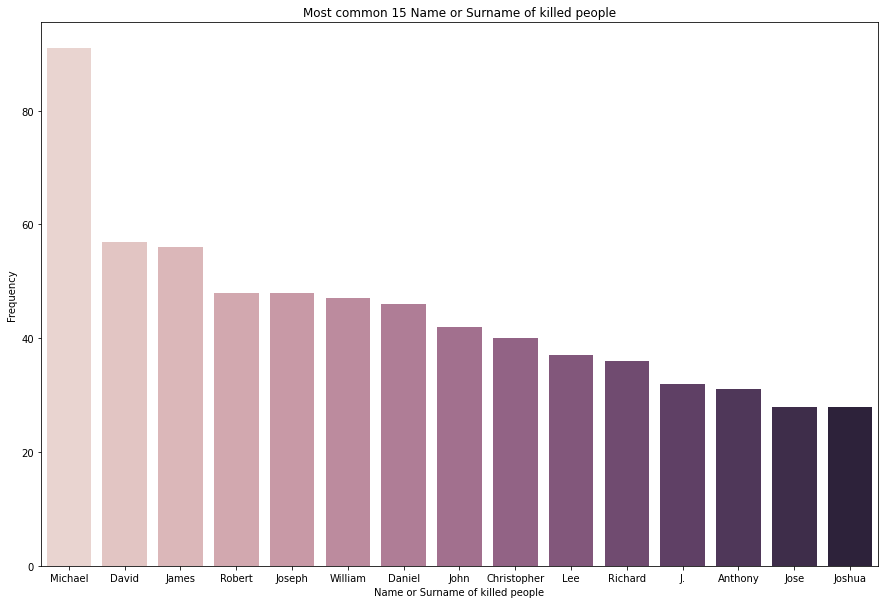

In [73]:
# 사망자들의 많이 쓰인 성과 이름 15가지.
separate = kill.name[kill.name != 'TK TK'].str.split()
a,b = zip(*separate)
name_list = a+b
name_count = Counter(name_list)
most_common_names = name_count.most_common(15)
x,y = zip(*most_common_names)
x,y = list(x), list(y)

#
plt.figure(figsize=(15,10))
ax = sns.barplot(x=x, y=y, palette = sns.cubehelix_palette(len(x)))
plt.xlabel('Name or Surname of killed people')
plt.ylabel('Frequency')
plt.title('Most common 15 Name or Surname of killed people')

In [74]:
percent_over_25_completed_highSchool.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [75]:
percent_over_25_completed_highSchool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null  object
 1   City                  29329 non-null  object
 2   percent_completed_hs  29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [76]:
percent_over_25_completed_highSchool.percent_completed_hs.value_counts()

100     1301
-        197
91.7     170
92.9     169
92.5     168
        ... 
47.9       1
25.9       1
32.5       1
38.2       1
42         1
Name: percent_completed_hs, Length: 728, dtype: int64

Text(0.5, 1.0, "Percentage of Given State's Population Above 25 that Has Graduated High School")

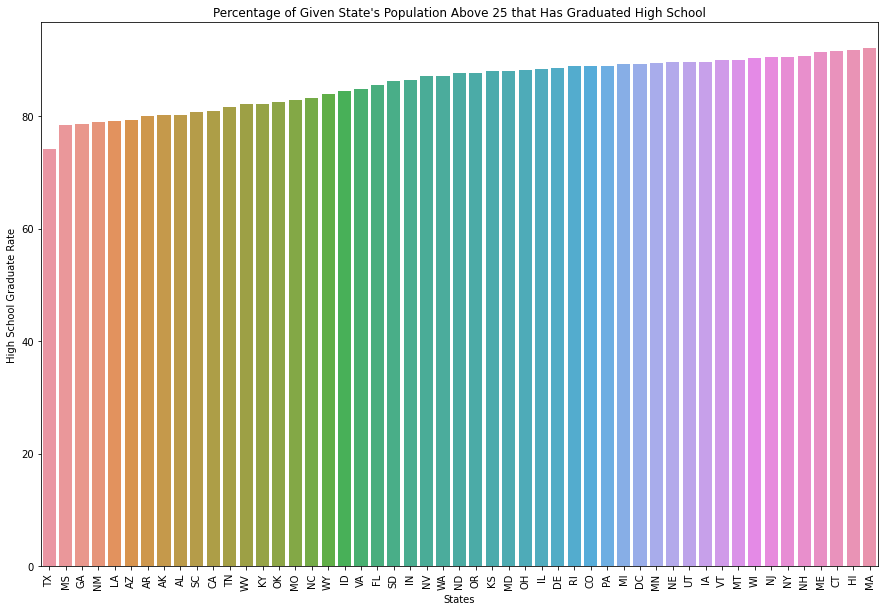

In [77]:
# 각 주(states)의 25살 이상인 사람들 중 고등학교 졸업률.
percent_over_25_completed_highSchool.percent_completed_hs.replace(['-'],0.0,inplace = True)
percent_over_25_completed_highSchool.percent_completed_hs = percent_over_25_completed_highSchool.percent_completed_hs.astype(float)
area_list
area_list = list(percent_over_25_completed_highSchool['Geographic Area'].unique())
area_highschool = []
for i in area_list:
    x = percent_over_25_completed_highSchool[percent_over_25_completed_highSchool['Geographic Area'] ==i]
    area_highschool_rate = sum(x.percent_completed_hs)/len(x)
    area_highschool.append(area_highschool_rate)
# sorting
data = pd.DataFrame({'area_list': area_list,'area_highschool_ratio':area_highschool})
new_index = (data['area_highschool_ratio'].sort_values(ascending=True)).index.values
sorted_data2 = data.reindex(new_index)
# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data2['area_list'], y=sorted_data2['area_highschool_ratio'])
plt.xticks(rotation= 90)
plt.xlabel('States')
plt.ylabel('High School Graduate Rate')
plt.title("Percentage of Given State's Population Above 25 that Has Graduated High School")


In [78]:
share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [79]:
share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


[Text(0, 0.5, 'States'),
 Text(0.5, 0, 'Percentage of Races'),
 Text(0.5, 1.0, "Percentage of State's Population According to Races")]

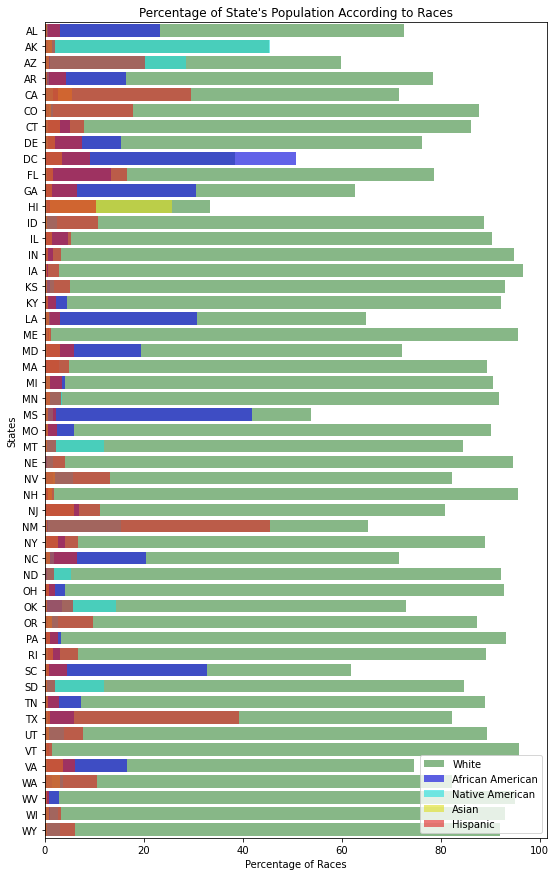

In [80]:
# 흑인, 백인, 아메리카 원주민, 아시아 및 히스패닉 인종들의 주(state) 인구 비율
share_race_city.replace(['-'],0.0,inplace=True)
share_race_city.replace(['(X)'],0.0, inplace=True)
share_race_city.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']] = share_race_city.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']].astype(float)
area_list = list(share_race_city['Geographic area'].unique())
share_white = []
share_black = []
share_native_american = []
share_asian = []
share_hispanic = []

for i in area_list :
    x = share_race_city[share_race_city['Geographic area']==i]
    share_white.append(sum(x.share_white)/len(x))
    share_black.append(sum(x.share_black)/len(x))
    share_native_american.append(sum(x.share_native_american)/len(x))
    share_asian.append(sum(x.share_asian)/len(x))
    share_hispanic.append(sum(x.share_hispanic)/len(x))

# 시각화.
f,ax = plt.subplots(figsize = (9,15))
sns.barplot(x=share_white, y=area_list, color='green', alpha = 0.5, label='White')
sns.barplot(x=share_black, y=area_list, color='blue', alpha = 0.7, label='African American')
sns.barplot(x=share_native_american, y=area_list, color='cyan', alpha = 0.6, label='Native American')
sns.barplot(x=share_asian, y=area_list, color='yellow', alpha = 0.6, label='Asian')
sns.barplot(x=share_hispanic, y=area_list, color='red', alpha = 0.6, label='Hispanic')

ax.legend(loc='lower right', frameon = True) # legendlarin gorunurlugu  *역자 : 죄송합니다. 의미를 모르겠습니다... legend는 범례입니다.
ax.set(xlabel='Percentage of Races', ylabel = 'States', title = "Percentage of State's Population According to Races")


<a id="2"></a>
## Point Plot

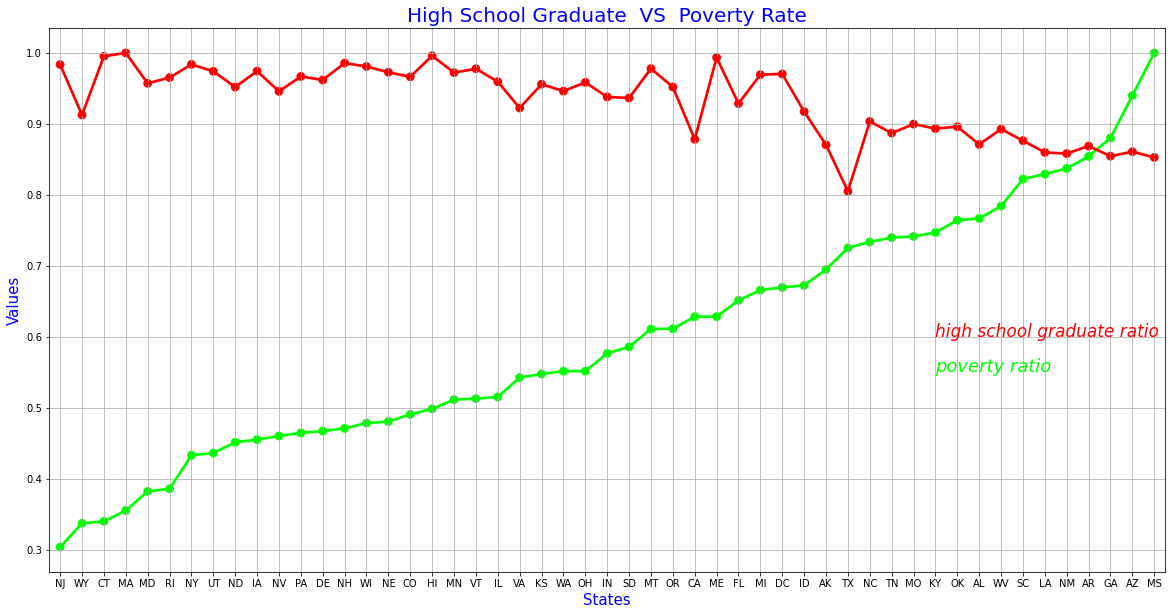

In [81]:
# 각 주(states)의 고등학교 졸업률 vs 빈곤율
sorted_data['area_poverty_ratio'] = sorted_data['area_poverty_ratio']/max( sorted_data['area_poverty_ratio'])
sorted_data2['area_highschool_ratio'] = sorted_data2['area_highschool_ratio']/max( sorted_data2['area_highschool_ratio'])
data = pd.concat([sorted_data,sorted_data2['area_highschool_ratio']],axis=1)
data.sort_values('area_poverty_ratio',inplace=True)

# 시각화
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='area_list',y='area_poverty_ratio',data=data,color='lime',alpha=0.8)
sns.pointplot(x='area_list',y='area_highschool_ratio',data=data,color='red',alpha=0.8)
plt.text(40,0.6,'high school graduate ratio',color='red',fontsize = 17,style = 'italic')
plt.text(40,0.55,'poverty ratio',color='lime',fontsize = 18,style = 'italic')
plt.xlabel('States',fontsize = 15,color='blue')
plt.ylabel('Values',fontsize = 15,color='blue')
plt.title('High School Graduate  VS  Poverty Rate',fontsize = 20,color='blue')
plt.grid()


In [82]:
data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


<a id="3"></a> 
## Joint Plot

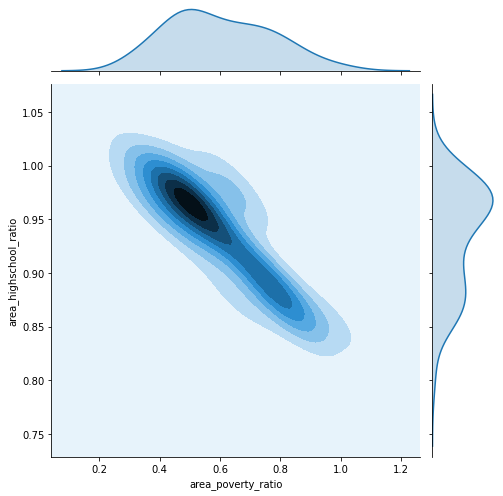

In [83]:

# 다른 스타일의 seaborn 코드로 고등학교 졸업률과 빈곤율을 시각화
# 공동 커널 밀도 (joint kernel density)
# pearsonr=1 이면 양의 상관 관계를 갖고 -1이면 음의 상관 관계를 갖는다.
# 0이라면 변수간에 상관 관계는 없다.
# 커널 밀도 추정을 사용하여 결합 분포를 표시
g = sns.jointplot(data.area_poverty_ratio, data.area_highschool_ratio, kind="kde", size=7)
plt.savefig('graph.png')
plt.show()

In [84]:
data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


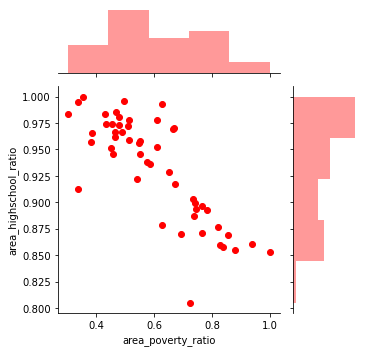

In [85]:
# joint plot의 파라미터를 변경할 수 있습니다.
# kind : { “scatter” | “reg” | “resid” | “kde” | “hex” }
# 파라미터의 사용법이 다르지만 이전과 동일한 plot이다.
g = sns.jointplot("area_poverty_ratio", "area_highschool_ratio", data=data,size=5, ratio=3, color="r")

<a id="4"></a> 
## Pie Chart

In [86]:
kill.race.head(15)

0     A
1     W
2     H
3     W
4     H
5     W
6     H
7     W
8     W
9     B
10    W
11    B
12    B
13    W
14    B
Name: race, dtype: object

In [87]:
kill.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

Text(0.5, 1.0, 'Killed People According to Races')

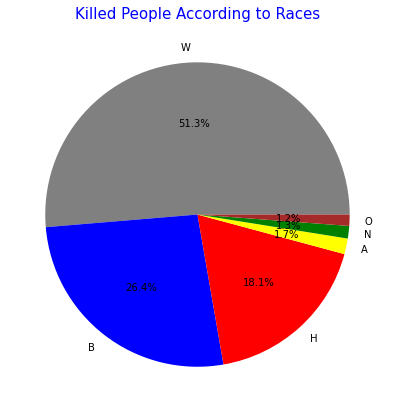

In [88]:
# 사망자 데이터의 인종 비율
kill.race.dropna(inplace = True)
labels = kill.race.value_counts().index
colors = ['grey', 'blue', 'red', 'yellow','green', 'brown']
explode = [0,0,0,0,0,0]
sizes = kill.race.value_counts().values

#시각화
plt.figure(figsize = (7,7))
plt.pie(sizes, explode = explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Killed People According to Races',color = 'blue',fontsize = 15)

<a id="5"></a> 
## Lm Plot

In [89]:
data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


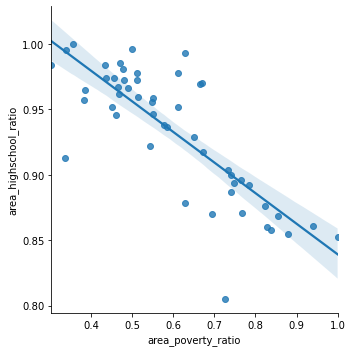

In [90]:
# 각 주(states)의 고등학교 졸업률 과 빈곤율에 대한 다른 seaborn 코드 시각화
# lmplot 
# 각 데이터 집합 내에서 선형 회귀 분석 결과 표시
sns.lmplot(x='area_poverty_ratio', y='area_highschool_ratio', data=data)
plt.show()

<a id="7"></a> 
## Violin Plot

In [91]:
data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


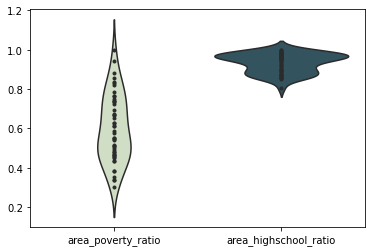

In [92]:
# violins 과 points로 분포를 보여준다.  *역자 : violins,points는 그래프 모양을 나타냄
# cubehelix를 사용하여 커스텀된 순차적 색(palette)를 얻는다
pal = sns.cubehelix_palette(2, rot=-.5, dark=.3)
sns.violinplot(data=data, palette=pal, inner="points")
plt.show()

<a id="8"></a> 
## Heatmap

In [93]:
data.corr()

,area_poverty_ratio,area_highschool_ratio
area_poverty_ratio,1.000000,-0.805761
area_highschool_ratio,-0.805761,1.000000


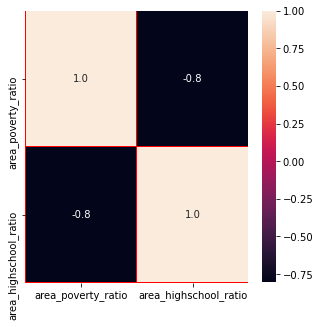

In [94]:
# 상관 관계 맵
# 각 주(states)의 고등학교 졸업률 과 빈곤율에 대한 다른 seaborn 코드 시각화
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(data.corr(), annot =True, linewidths=0.5, linecolor = "red", fmt ='.1f', ax=ax)
plt.show()

<a id="9"></a> 
## Box Plot

In [95]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [96]:
kill.manner_of_death.unique()

array(['shot', 'shot and Tasered'], dtype=object)

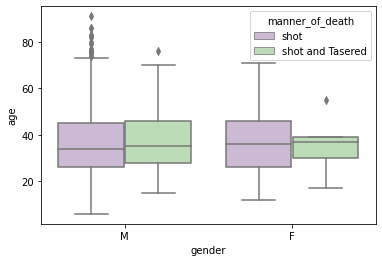

In [97]:
# 사망 원인 (manner of death) : 총, 총과 테이저건(Tasesred *) ( *역자 : 원글은 ates edilerek, ates edilerek ve sok tabancasiyla 라고 표기되어있습니다. 영어가 아닌것같네요...)
# 성별
# 나이
# 수평 박스를 이용한 Plot
sns.boxplot(x="gender", y="age", hue="manner_of_death", data=kill, palette="PRGn")
plt.show()

1. <a id="10"></a> 
## Swarm Plot

In [98]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


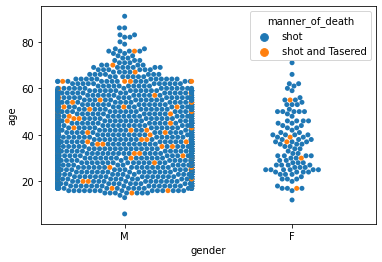

In [100]:
# swarm plot
# 사망 원인 (manner of death) : 총, 총과 테이저건(Tasesred *) ( *역자 : 원글은 ates edilerek, ates edilerek ve sok tabancasiyla 라고 표기되어있습니다. 영어가 아닌것같네요...)
# 성별
# 나이
sns.swarmplot(x="gender", y="age", hue="manner_of_death", data=kill)
plt.show()

<a id="11"></a> 
## Pair Plot

In [101]:
data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


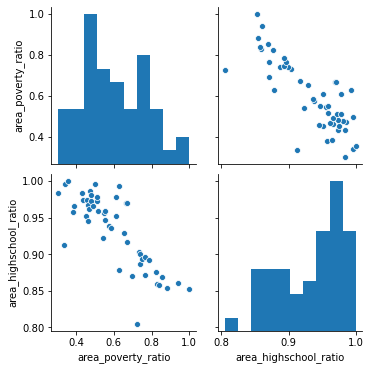

In [102]:
#pair plot
sns.pairplot(data)
plt.show()

<a id="12"></a> 
## Count Plot

In [103]:
kill.gender.value_counts()

M    2428
F     107
Name: gender, dtype: int64

In [104]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


Text(0.5, 1.0, 'gender')

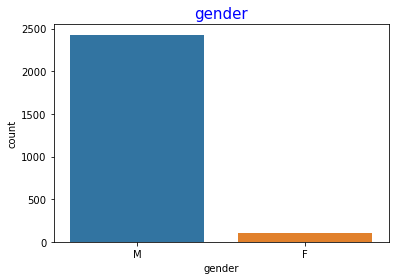

In [107]:
# 사망자 특징(properties)
# 사망 원인
sns.countplot(kill.gender)
# sns.countplot(kill.manner_of_death)
plt.title("gender", color = "blue", fontsize = 15)

Text(0.5, 1.0, 'Kill weapon')

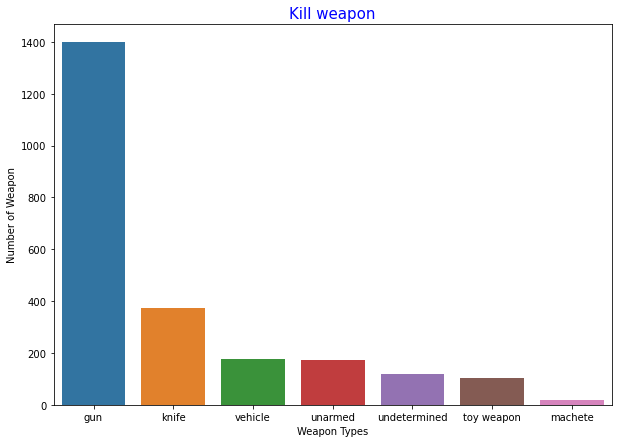

In [108]:
# 살인 무기
armed = kill.armed.value_counts()
#print(armed)
plt.figure(figsize=(10,7))
sns.barplot(x=armed[:7].index,y=armed[:7].values)
plt.ylabel('Number of Weapon')
plt.xlabel('Weapon Types')
plt.title('Kill weapon',color = 'blue',fontsize=15)